In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats

In [3]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = iris.target
target_names = iris.target_names
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


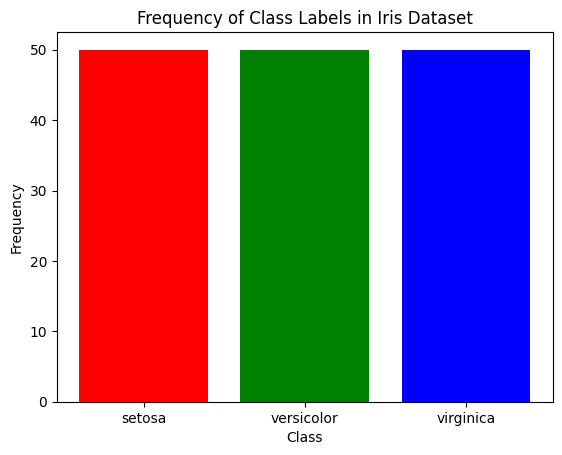

In [5]:
#a
class_counts = data.groupby(target_names[target]).size()
plt.bar(target_names, class_counts, color=["red","green","blue"])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of Class Labels in Iris Dataset")
plt.show()

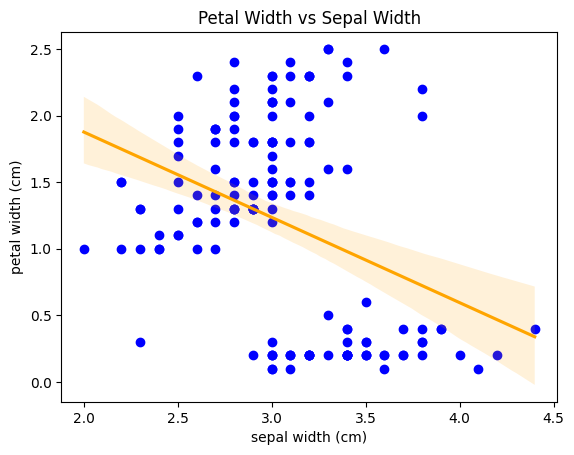

In [6]:
#b
plt.scatter(data["sepal width (cm)"], data["petal width (cm)"], color="blue")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Width vs Sepal Width")
sns.regplot(x="sepal width (cm)", y="petal width (cm)", data=data, scatter=False, color="orange")
plt.show()

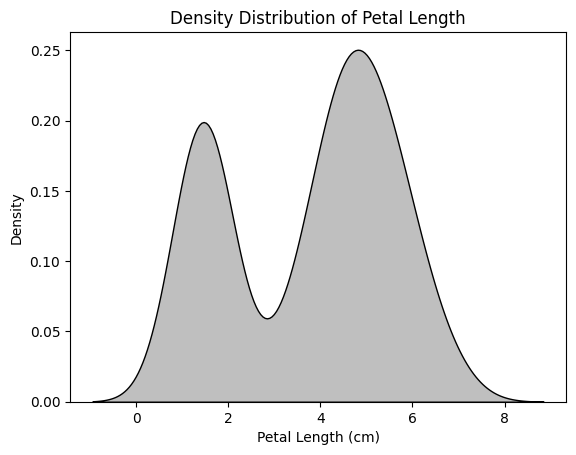

In [7]:
#c
sns.kdeplot(data["petal length (cm)"], fill=True, color="black")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Density")
plt.title("Density Distribution of Petal Length")
plt.show()

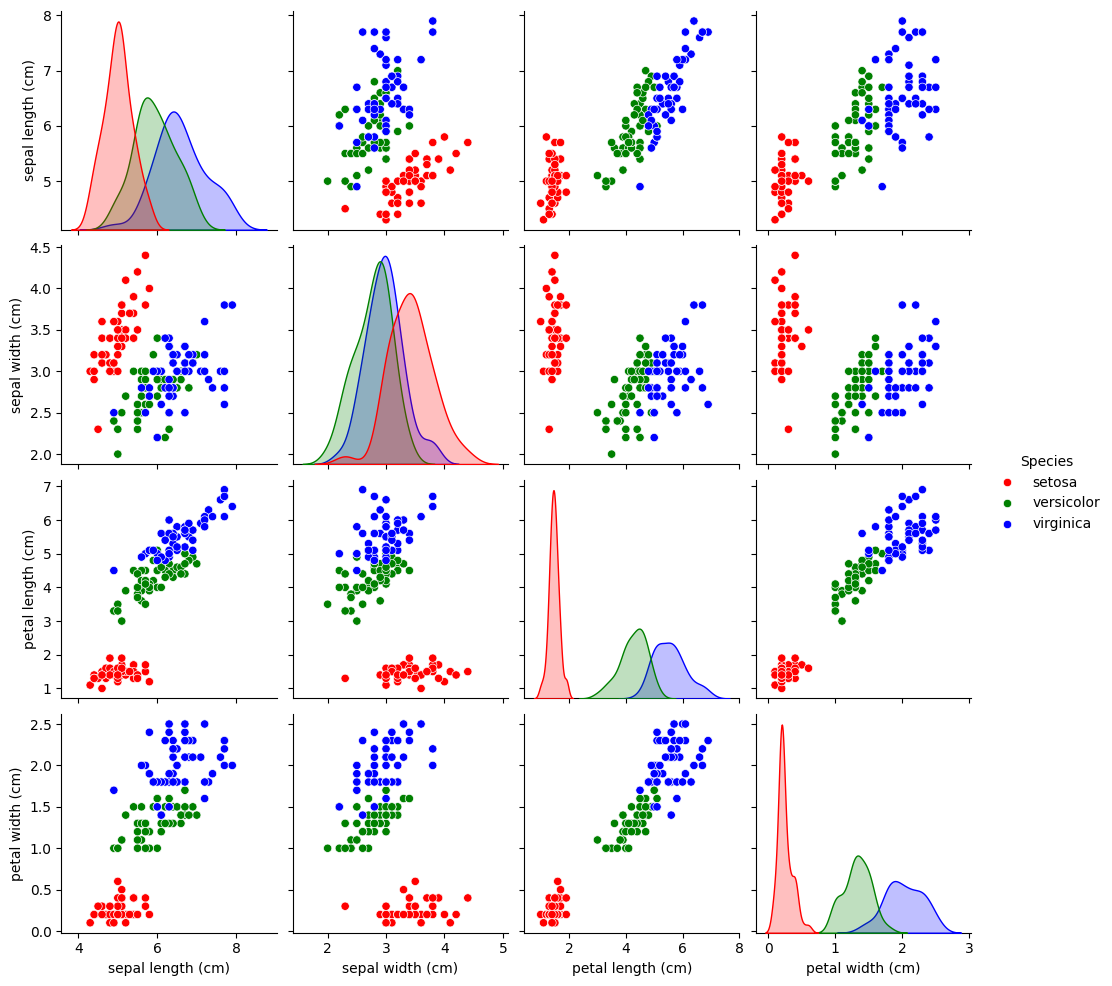

In [8]:
#d
classes = {0:"setosa", 1:"versicolor", 2:"virginica"}
data["Target"] = iris.target
data["Species"] = data["Target"].map(classes)
data.drop("Target", axis=1, inplace=True)
sns.pairplot(data=data, hue="Species", palette=["Red", "Green", "Blue"])
plt.show()

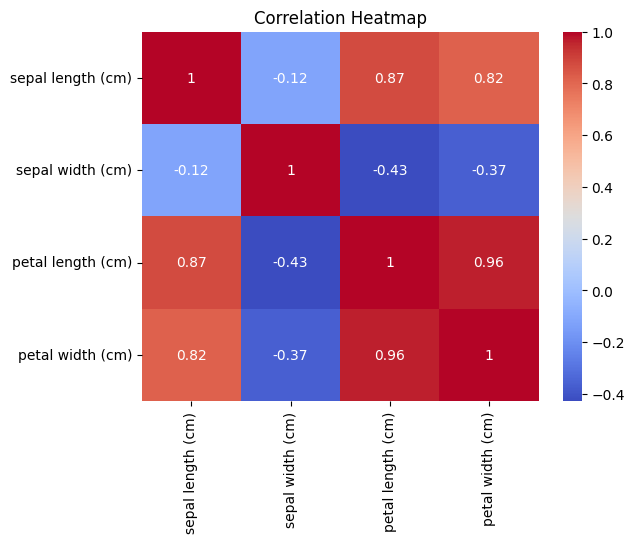

In [9]:
#e
data.drop("Species", axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
#f
feature_stats = data.describe().loc[["mean", "std", "50%"]]
feature_stats = feature_stats._append(data.mode().iloc[0], ignore_index=True)
conf_int = stats.t.interval(0.95, len(data)-1, loc=data.mean(), scale=stats.sem(data))
feature_stats = feature_stats._append(pd.Series(conf_int, index=["95% CI Min", "95% CI Max"]),
                                     ignore_index=True)
feature_stats.index = ["Mean", "Standard Deviation", "Media", "Mode", "CI"]
print(feature_stats)

                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
Mean                         5.843333          3.057333           3.758000   
Standard Deviation           0.828066          0.435866           1.765298   
Media                        5.800000          3.000000           4.350000   
Mode                         5.000000          3.000000           1.400000   
CI                                NaN               NaN                NaN   

                    petal width (cm)  \
Mean                        1.199333   
Standard Deviation          0.762238   
Media                       1.300000   
Mode                        0.200000   
CI                               NaN   

                                                           95% CI Min  \
Mean                                                              NaN   
Standard Deviation                                                NaN   
Media                                                             NaN  

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


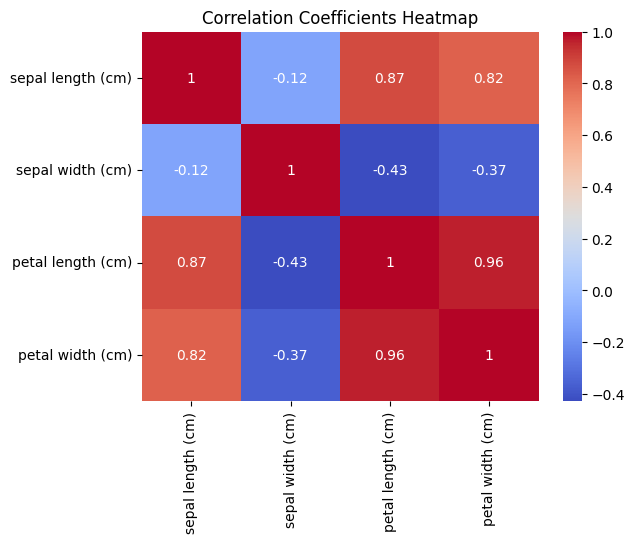

In [13]:
#g
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Coefficients Heatmap")
plt.show()